In [1]:
import PIL.Image as Image
import cv2
import numpy as np

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers,losses
from tensorflow.keras.models import Sequential

In [2]:
import os
import zipfile

local_zip = '/content/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/dataset/test_set')
zip_ref.close()

In [4]:
import os
import zipfile

local_zip = '/content/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/dataset/training_set')
zip_ref.close()

In [5]:
import pathlib
train_dir = pathlib.Path("/content/dataset/training_set")
test_dir=pathlib.Path("/content/dataset/test_set")

print(train_dir)
print(test_dir)

/content/dataset/training_set
/content/dataset/test_set


In [6]:
list(train_dir.glob('*/*'))[:5]


[PosixPath('/content/dataset/training_set/__MACOSX/cats'),
 PosixPath('/content/dataset/training_set/__MACOSX/dogs'),
 PosixPath('/content/dataset/training_set/cats/cat_311.jpg'),
 PosixPath('/content/dataset/training_set/cats/cat_540.jpg'),
 PosixPath('/content/dataset/training_set/cats/cat_59.jpg')]

In [7]:
cat_train= list(train_dir.glob('cats/*'))
len(cat_train)

279

In [8]:
image_count= len(list(train_dir.glob('*/*.jpg')))
image_count

557

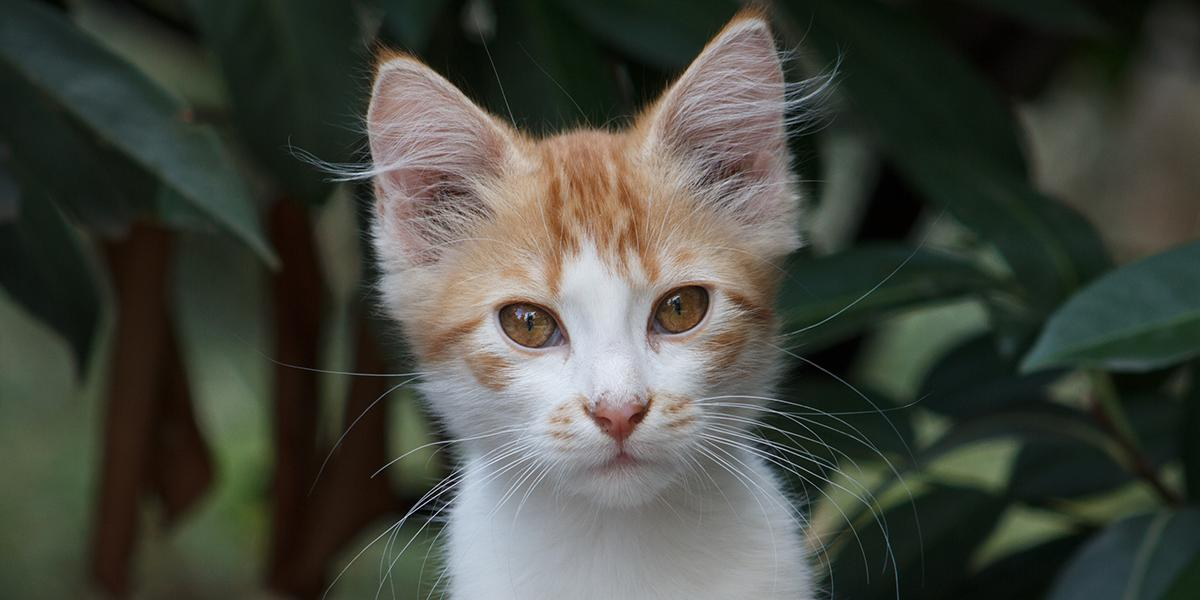

In [9]:
Image.open(str(cat_train[100]))


In [10]:
dog_train= list(train_dir.glob('dogs/*'))
len(cat_train)

279

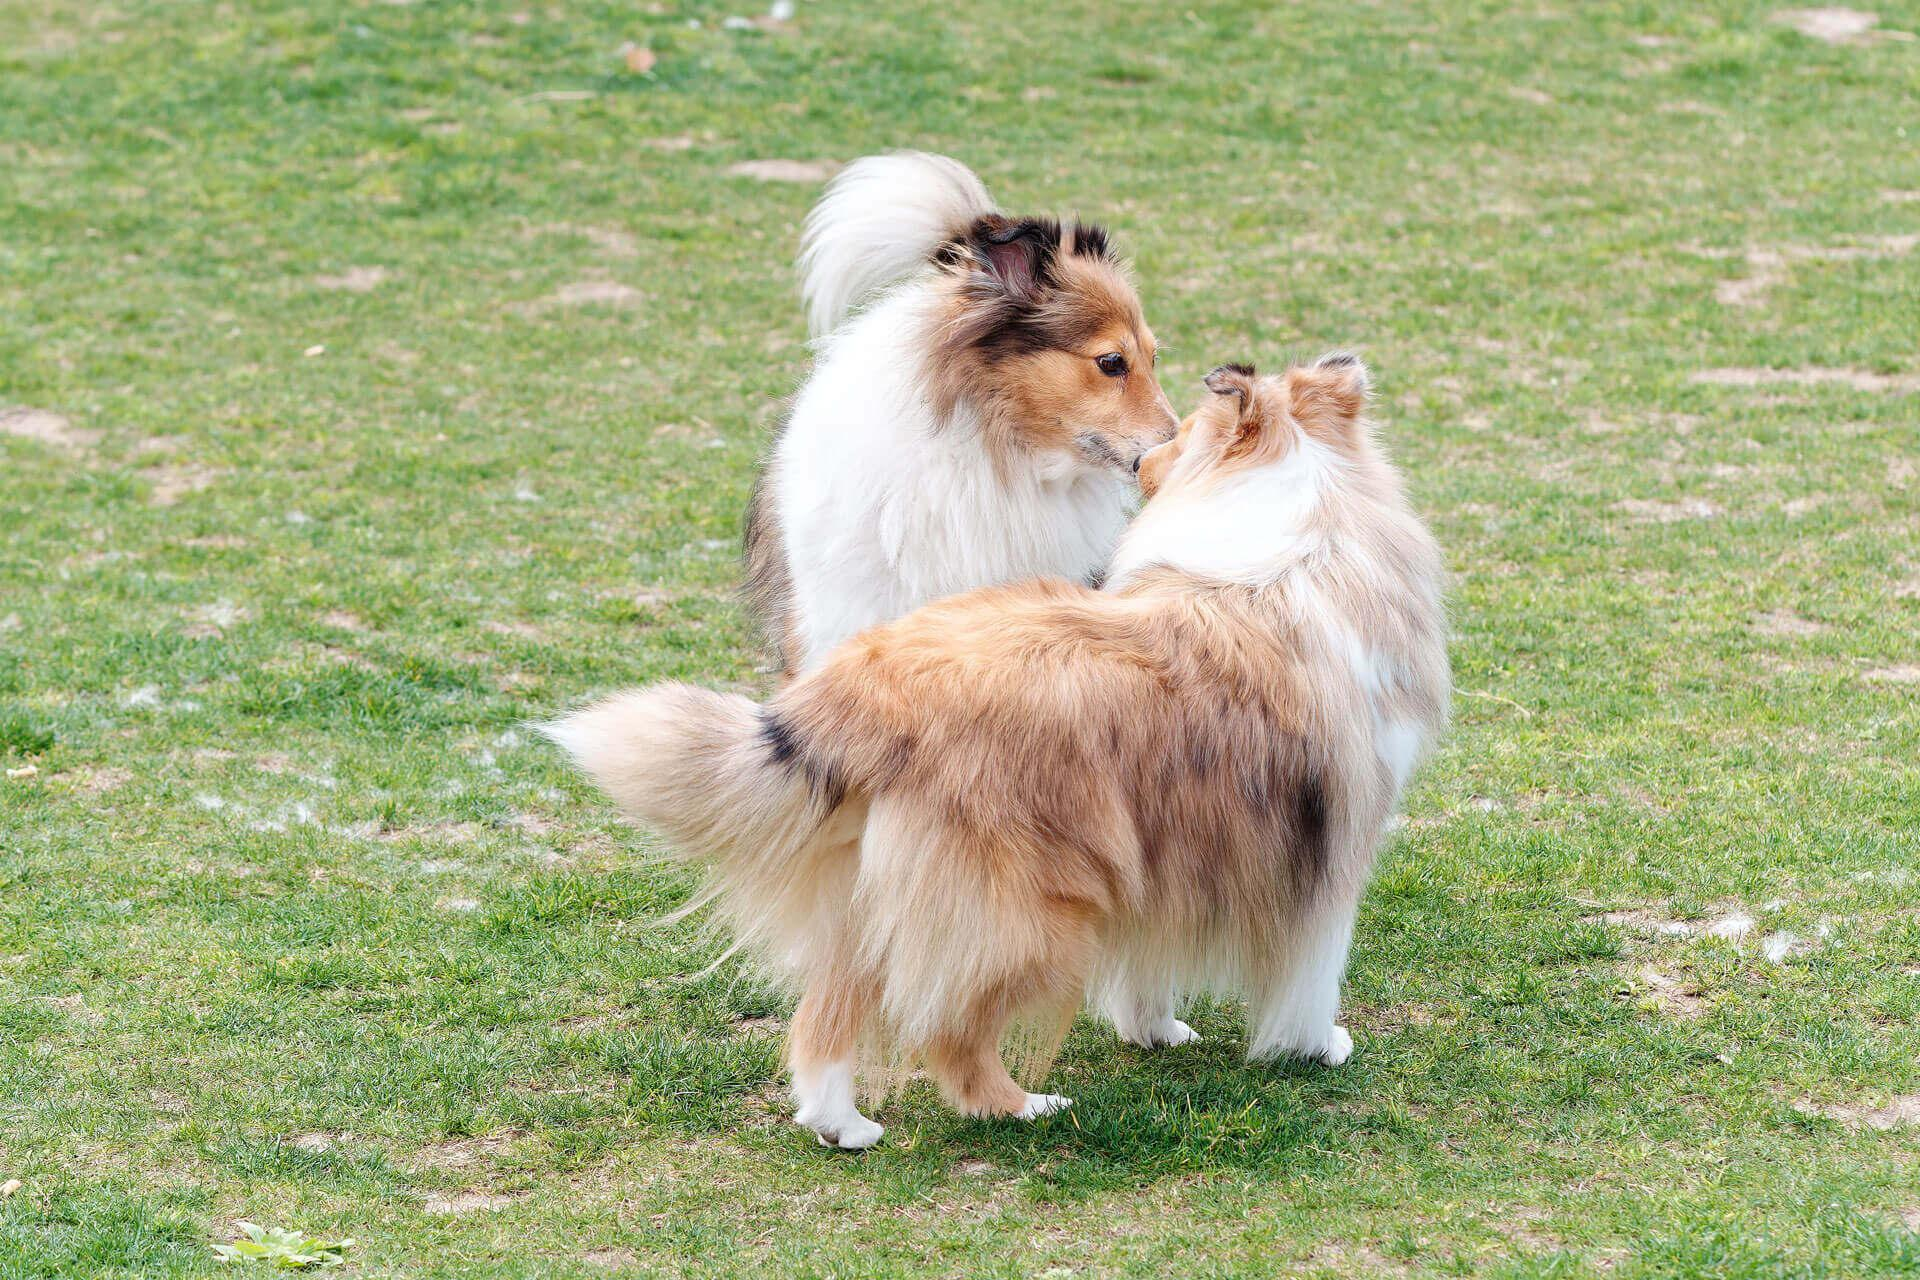

In [11]:
Image.open(str(dog_train[169]))


In [12]:
images_dict = {
    'cats': cat_train[:2200],
    'dogs': dog_train[:2200],
}

In [13]:
images_dict["dogs"][:5]


[PosixPath('/content/dataset/training_set/dogs/dog_436.jpg'),
 PosixPath('/content/dataset/training_set/dogs/dog_209.jpg'),
 PosixPath('/content/dataset/training_set/dogs/dog_474.jpg'),
 PosixPath('/content/dataset/training_set/dogs/dog_419.jpg'),
 PosixPath('/content/dataset/training_set/dogs/dog_287.jpg')]

In [14]:
labels_dict = {
    'cats': 0,
    'dogs': 1,

}

In [15]:
img= cv2.imread(str(images_dict['cats'][0]))


In [16]:
img.shape


(533, 800, 3)

In [17]:
X, y = [], []
for name,images in images_dict.items():#returns key , path for each record
    for image in images:
        img=cv2.imread(str(image))

        resize_img=cv2.resize(img,(224,224))

        X.append(resize_img)
        y.append(labels_dict[name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
X.shape,y.shape


((557, 224, 224, 3), (557,))

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30 ,random_state=0)

In [21]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [22]:
pip install tf_keras

In [23]:
import tf_keras

In [24]:
model = tf_keras.Sequential([
                pretrained_model_without_top_layer,
                tf_keras.layers.Dense(2)
])

In [25]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [26]:
# Scaling the image
X_train_scaled = X_train / 255
X_val_scaled = X_val / 255

In [27]:
model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
history = model.fit(X_train_scaled, y_train,validation_data=(X_val_scaled,y_val),epochs=5)

Epoch 1/5
13/13 [==============================] - 62s 4s/step - loss: 0.5600 - acc: 0.7198 - val_loss: 0.2368 - val_acc: 0.9226
Epoch 2/5
13/13 [==============================] - 24s 2s/step - loss: 0.2353 - acc: 0.9049 - val_loss: 0.1387 - val_acc: 0.9405
Epoch 3/5
13/13 [==============================] - 24s 2s/step - loss: 0.1584 - acc: 0.9383 - val_loss: 0.1051 - val_acc: 0.9643
Epoch 4/5
13/13 [==============================] - 24s 2s/step - loss: 0.1269 - acc: 0.9460 - val_loss: 0.0990 - val_acc: 0.9762
Epoch 5/5
13/13 [==============================] - 26s 2s/step - loss: 0.1011 - acc: 0.9589 - val_loss: 0.0884 - val_acc: 0.9702


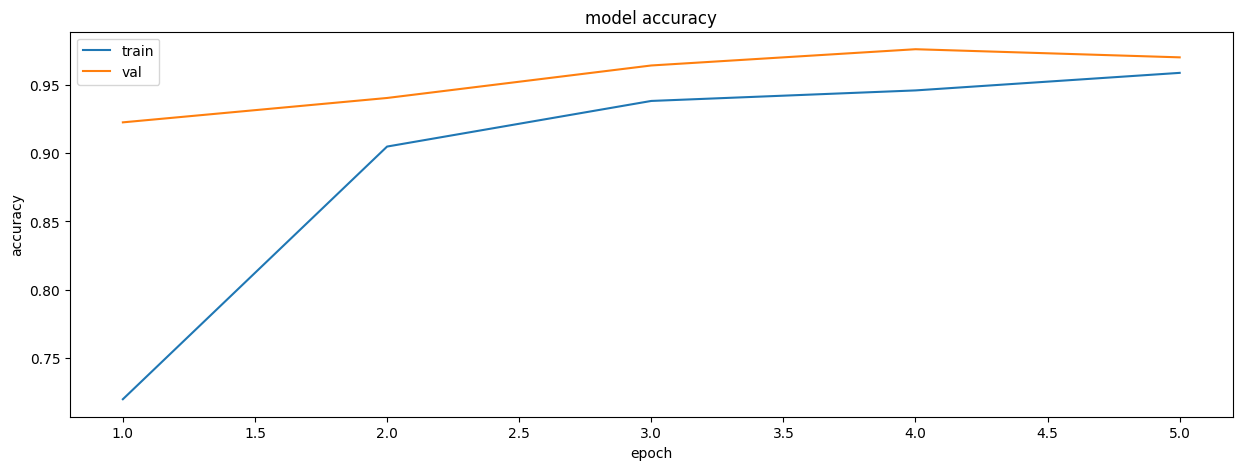

In [28]:
plt.figure(figsize=(15,5))
epochs=range(1,len(history.history['val_acc'])+1)

plt.plot(epochs,history.history['acc'])
plt.plot(epochs,history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

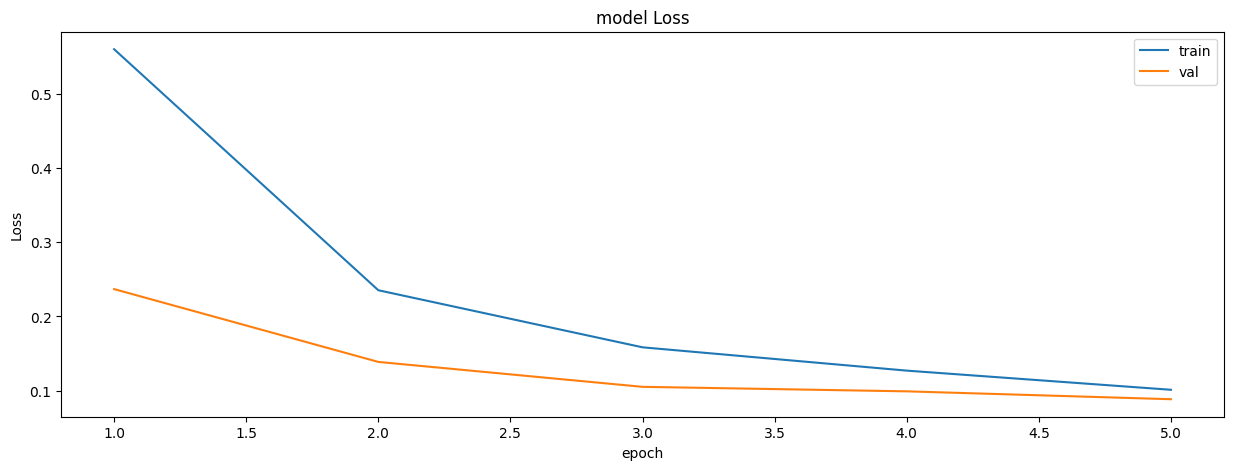

In [29]:
plt.figure(figsize=(15,5))
epochs=range(1,len(history.history['val_loss'])+1)

plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [30]:
cat_test= list(test_dir.glob('cats/*'))
dog_test= list(test_dir.glob('dogs/*'))

In [31]:
len (dog_test)


70

In [32]:
test_images_dict = {
    'cats': cat_test,
    'dogs': dog_test,
}

test_labels_dict = {
    'cats': 0,
    'dogs': 1,

}

In [33]:
X_test, y_test = [], []
for name,images in test_images_dict.items():#returns key , path for each record
    for image in images:
        img=cv2.imread(str(image))

        resize_img=cv2.resize(img,(224,224))

        X_test.append(resize_img)
        y_test.append(test_labels_dict[name])

In [34]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [35]:
X_test.shape


(140, 224, 224, 3)

In [36]:
X_test_scaled = X_test / 255

In [37]:
model.evaluate(X_test_scaled,y_test)


5/5 [==============================] - 4s 825ms/step - loss: 0.2267 - acc: 0.8857


[0.22672495245933533, 0.8857142925262451]

In [47]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files


In [48]:

# Load and preprocess image
def load_and_preprocess_image(file_path):
    # Load and preprocess the image
    img = cv2.imread(file_path)
    img_resized = cv2.resize(img, (224, 224))
    img_scaled = img_resized / 255.0
    img_scaled = np.expand_dims(img_scaled, axis=0)  # Add batch dimension

    return img_scaled


In [49]:

# Classify image and display result
def classify_and_display_result(model, file_path):
    img_scaled = load_and_preprocess_image(file_path)

    # Make prediction
    predictions = model.predict(img_scaled)
    score = tf.nn.softmax(predictions[0])
    class_idx = np.argmax(score)
    class_name = 'Dog' if class_idx == 1 else 'Cat'
    confidence = 100 * np.max(score)

    # Display result
    plt.figure(figsize=(6,6))
    img_display = cv2.imread(file_path)
    img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
    plt.imshow(img_display)
    plt.axis('off')
    plt.title(f"{class_name}", fontsize=24, color='blue')
    plt.figtext(0.5, 0.01, f"Confidence: {confidence:.2f}%", ha="center", fontsize=14, color='black')
    plt.show()


1/1 [==============================] - 0s 161ms/step


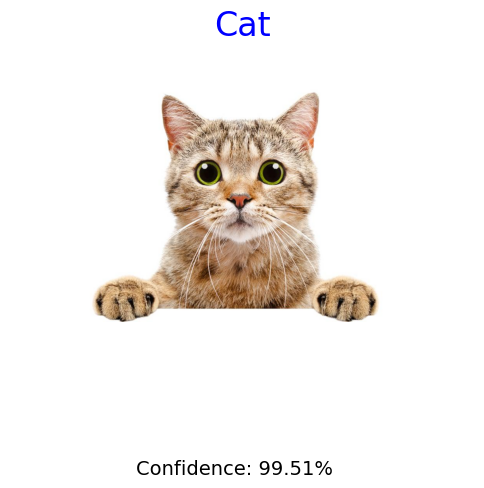

In [50]:

# Provide the path to the image
image_path = "/content/cat_106.jpg"  # Replace with your image file path
classify_and_display_result(model, image_path)


1/1 [==============================] - 0s 51ms/step


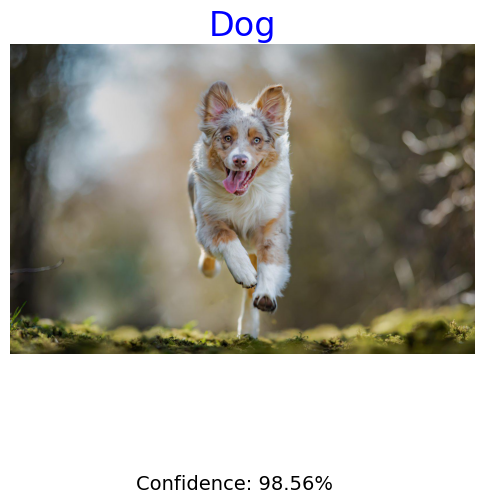

In [51]:

# Provide the path to the image
image_path = "/content/dog_0.jpg"  # Replace with your image file path
classify_and_display_result(model, image_path)


Saving dog_0.jpg to dog_0 (2).jpg
1/1 [==============================] - 0s 55ms/step


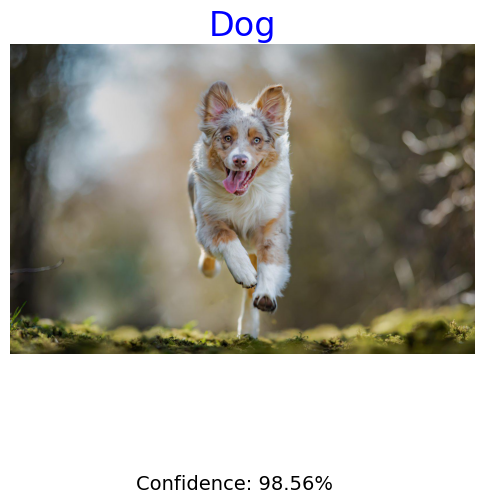

In [52]:
# Upload file from local machine
uploaded = files.upload()

# Process and display the first uploaded image
for file_name in uploaded.keys():
    classify_and_display_result(model, file_name)
    break  # Only process the first uploaded file
